####Let's start by importing our required dataset. The dataset we are using is the Amazon Reviews!

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving reviews_clean5.csv to reviews_clean5 (1).csv


In [ ]:
import pandas as pd
import numpy as np
pd.set_option("display.max_colwidth", -1)

df = pd.read_csv('reviews_clean5.csv',nrows=50000)#df
df

<ipython-input-1-ae151c4fefd9>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,Unnamed: 0,Id,Summary,Text
0,0,1,good quality dog food,i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most
1,1,2,not as advertised,product arrived labeled as jumbo salted peanutsthe peanuts were actually small sized unsalted not sure if this was an error or if the vendor intended to represent the product as jumbo
2,2,3,delight says it all,this is a confection that has been around a few centuries it is a light pillowy citrus gelatin with nuts in this case filberts and it is cut into tiny squares and then liberally coated with powdered sugar and it is a tiny mouthful of heaven not too chewy and very flavorful i highly recommend this yummy treat if you are familiar with the story of cs lewis the lion the witch and the wardrobe this is the treat that seduces edmund into selling out his brother and sisters to the witch
3,3,4,cough medicine,if you are looking for the secret ingredient in robitussin i believe i have found it i got this in addition to the root beer extract i ordered and made some cherry soda the flavor is very medicinal
4,4,5,great taffy,great taffy at a great price there was a wide assortment of yummy taffy delivery was very quick if your a taffy lover this is a deal
...,...,...,...,...
49995,54264,54265,great cappuccino,i really like this cappuccino it is very tasty we add a little torani flavoring to ours the only reason for the 4 stars and not 5 is because the skinny version is better less calories this cappuccino is better than any kcup it is like going to starbucks but at home
49996,54265,54266,addicted to my nescafe dulce gusto,love all the dulce gustos but not crazy about hot choc cappuccino iced cap are best sipping a hot one while i speak love latte too but not vanilla latte dark roast is my favorite daily thank heavens amazon offers it and much more affordable prices than anyone else trust me i have researched best price is on subscription and so much fun to receive great packing and speed always get before projected date it is almost affordable but it is part of my champagne taste condition i will try peach tea yum next summer
49997,54266,54267,the best coffee capsules,we love dolce gusto cappucino the espresso flavor is pure and the milk capsule is perfect truly people would think that you steamed the milk in the steameri purchase dolce gusto only from amazon forget ordering from the dolce gusto co or bed bath and beyond you pay way too much money i use the subscribe order very easy and saves me money
49998,54267,54268,good taste at best price,i really like the dolce gusto cappuccino and the mocha especially since i can custom brew each cup this is the best deal price wise and the 3pack provides a larger quantity than the single boxes so i do not have to order as often


In [ ]:
df[df['Text'].duplicated()]


,Unnamed: 0,Id,Summary,Text
2647,2656,2657,good stuff,this is good iced tea it is hard to find locally in the fall and winter
5907,5929,5930,careful moldy product usda now involved,my baby enjoyed this flavor when i purchased it at a store i ordered a case of it from amazon the whole case arrived moldy each jar popped when i opened it too showing that it was properly sealed i contacted earth best they said they would look into it but would not follow up with me given what is going on in our food industry i will not purchase any more products from this company it is to scary when feeding a baby amazon refunded me but did not take it any further be very careful and inform other families too update i was so disappointed with the lack of concern from earth best and amazon i contacted the fda they referred me to the usda because the product contained meat they took it very serious and had also received several complaints they have come to my house and written a report if anyone else noticed this problem please contact the usda to report your claim problem they will investigate the problem and the earth best plant to make sure they are following regulations
6510,6535,6536,false advertising terrible dog food,i bought this dog food because the bag showed pictured of veggies and chunks of meat and with a name like beneful i thought i was purchasing a nutritious brand of dog food my dogs did eat this food but after reading the ingredients i completely regret purchasing it and feel just awful for feeding it to my dogs the first three ingredients are ground yellow corn chicken by product meal and corn gluten meal how disgusting is that the main ingredient is a corn filler one thing my vet told me a while back that i never forgot when you eat corn what comes out of the other end the same thing happens with dogs basically dogs cannot digest corn it is just a filler and causes them to actually eat more to feel full poop out more and retain less nutrients the only meat in beneful at all is a by product its not even a real meat by products are the stuff leftover once all the actual meat is harvested we are talking beaks chicken feet eyeballs even chicken poop i would not recommend this product to anyone for any reason ever it is an absolutely awful dog food i cannot believe the pictures of veggies and full chunks of meat on the bag can be allowed to be on the packaging of such a disgusting product it is very misleading and should be considered false advertising i recommend to stay far away from beneful and most purina products when purchasing a dog food the most important thing to consider is the first 3 ingredients just make sure those first three are decent ingredients that you would eat yourself now that i know what to look for i usually buy my pets all natural organic foods such as blue buffalo halo or wellness
8085,8114,8115,zesty spearmint and lemon are modulated by green tea into a substantial potion,zen brews up to an golden amber liquor the aroma is sweet spearmint the blending of this tea is excellentspearmint could be overpowering but they use just the right amount of it slightly sweet spearmint is the primary flavor then you taste a hint of lemon the green tea provides an herbal base for these two flavors that makes the intial impression of zesty spearmint and lemon modulate into a substantial potion very nice and satisfying with a clean spearmint aftertaste remember that this tea does have caffeinehowever it does not say how much on the box a good estimate might be 30 mgcompared to 90mg for the average cup of coffee make sure you time how long you brew this tea because if you brew too long it becomes bitter four minutes is ample
12878,13457,13458,perfect storage for homemade baby food,this is the perfect storage for the baby food i make at home i am a working mom so time is not on my side when it comes to doing things for my son but it is important for me to make him healthy homemade meals and this container helps me by allowing m

In [ ]:
df.drop_duplicates(subset=['Text'], inplace=True)
df.dropna(axis=0,inplace=True)
df.replace('',np.nan,inplace=True)

#### Let's take a look at the number distribution of our texts and summaries respectively.

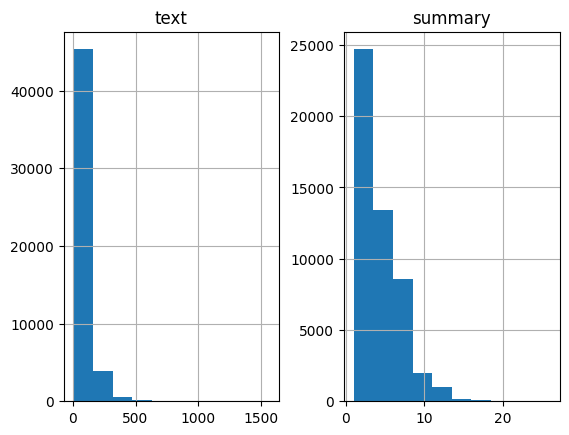

In [ ]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df['Text']:
      text_word_count.append(len(i.split()))

for i in df['Summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 10)
plt.show()

In [ ]:
max_text_len=150
max_summary_len=10

cleaned_text =np.array(df['Text'])
cleaned_summary=np.array(df['Summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])

df=pd.DataFrame({'text':short_text,'summary':short_summary})

### Let's remove short words to further clean our data.

In [ ]:
def remove_short(text):
  tokens = text.split()
  longs = []
  for i in tokens:
     if len(i)>1:
        longs.append(i)
  return (" ".join(longs))

clean_summary = []
for t in df['summary']:
   clean_summary.append(remove_short(t))



In [ ]:
df['summary'] = clean_summary

df = df[df['summary'].str.len()>=2]
df.head(10)

,text,summary
0,i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most,good quality dog food
1,product arrived labeled as jumbo salted peanutsthe peanuts were actually small sized unsalted not sure if this was an error or if the vendor intended to represent the product as jumbo,not as advertised
2,this is a confection that has been around a few centuries it is a light pillowy citrus gelatin with nuts in this case filberts and it is cut into tiny squares and then liberally coated with powdered sugar and it is a tiny mouthful of heaven not too chewy and very flavorful i highly recommend this yummy treat if you are familiar with the story of cs lewis the lion the witch and the wardrobe this is the treat that seduces edmund into selling out his brother and sisters to the witch,delight says it all
3,if you are looking for the secret ingredient in robitussin i believe i have found it i got this in addition to the root beer extract i ordered and made some cherry soda the flavor is very medicinal,cough medicine
4,great taffy at a great price there was a wide assortment of yummy taffy delivery was very quick if your a taffy lover this is a deal,great taffy
5,i got a wild hair for taffy and ordered this five pound bag the taffy was all very enjoyable with many flavors watermelon root beer melon peppermint grape etc my only complaint is there was a bit too much red black licorice flavored pieces between me my kids and my husband this lasted only two weeks i would recommend this brand of taffy it was a delightful treat,nice taffy
6,this saltwater taffy had great flavors and was very soft and chewy each candy was individually wrapped well none of the candies were stuck together which did happen in the expensive version fralinger would highly recommend this candy i served it at a beach themed party and everyone loved it,great just as good as the expensive brands
7,this taffy is so good it is very soft and chewy the flavors are amazing i would definitely recommend you buying it very satisfying,wonderful tasty taffy
8,right now i am mostly just sprouting this so my cats can eat the grass they love it i rotate it around with wheatgrass and rye too,yay barley
9,this is a very healthy dog food good for their digestion also good for small puppies my dog eats her required amount at every feeding,healthy dog food


In [ ]:
df1 = df.copy()
df1['summary'] = df1['summary'].apply(lambda x : 'SOSTOKEN '+ str(x) + ' ENDTOKEN')
df1

,text,summary
0,i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most,SOSTOKEN good quality dog food ENDTOKEN
1,product arrived labeled as jumbo salted peanutsthe peanuts were actually small sized unsalted not sure if this was an error or if the vendor intended to represent the product as jumbo,SOSTOKEN not as advertised ENDTOKEN
2,this is a confection that has been around a few centuries it is a light pillowy citrus gelatin with nuts in this case filberts and it is cut into tiny squares and then liberally coated with powdered sugar and it is a tiny mouthful of heaven not too chewy and very flavorful i highly recommend this yummy treat if you are familiar with the story of cs lewis the lion the witch and the wardrobe this is the treat that seduces edmund into selling out his brother and sisters to the witch,SOSTOKEN delight says it all ENDTOKEN
3,if you are looking for the secret ingredient in robitussin i believe i have found it i got this in addition to the root beer extract i ordered and made some cherry soda the flavor is very medicinal,SOSTOKEN cough medicine ENDTOKEN
4,great taffy at a great price there was a wide assortment of yummy taffy delivery was very quick if your a taffy lover this is a deal,SOSTOKEN great taffy ENDTOKEN
...,...,...
43774,i really like this cappuccino it is very tasty we add a little torani flavoring to ours the only reason for the 4 stars and not 5 is because the skinny version is better less calories this cappuccino is better than any kcup it is like going to starbucks but at home,SOSTOKEN great cappuccino ENDTOKEN
43775,love all the dulce gustos but not crazy about hot choc cappuccino iced cap are best sipping a hot one while i speak love latte too but not vanilla latte dark roast is my favorite daily thank heavens amazon offers it and much more affordable prices than anyone else trust me i have researched best price is on subscription and so much fun to receive great packing and speed always get before projected date it is almost affordable but it is part of my champagne taste condition i will try peach tea yum next summer,SOSTOKEN addicted to my nescafe dulce gusto ENDTOKEN
43776,we love dolce gusto cappucino the espresso flavor is pure and the milk capsule is perfect truly people would think that you steamed the milk in the steameri purchase dolce gusto only from amazon forget ordering from the dolce gusto co or bed bath and beyond you pay way too much money i use the subscribe order very easy and saves me money,SOSTOKEN the best coffee capsules ENDTOKEN
43777,i really like the dolce gusto cappuccino and the mocha especially since i can custom brew each cup this is the best deal price wise and the 3pack provides a larger quantity than the single boxes so i do not have to order as often,SOSTOKEN good taste at best price ENDTOKEN


In [ ]:
df.head()

,text,summary
0,i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most,good quality dog food
1,product arrived labeled as jumbo salted peanutsthe peanuts were actually small sized unsalted not sure if this was an error or if the vendor intended to represent the product as jumbo,not as advertised
2,this is a confection that has been around a few centuries it is a light pillowy citrus gelatin with nuts in this case filberts and it is cut into tiny squares and then liberally coated with powdered sugar and it is a tiny mouthful of heaven not too chewy and very flavorful i highly recommend this yummy treat if you are familiar with the story of cs lewis the lion the witch and the wardrobe this is the treat that seduces edmund into selling out his brother and sisters to the witch,delight says it all
3,if you are looking for the secret ingredient in robitussin i believe i have found it i got this in addition to the root beer extract i ordered and made some cherry soda the flavor is very medicinal,cough medicine
4,great taffy at a great price there was a wide assortment of yummy taffy delivery was very quick if your a taffy lover this is a deal,great taffy


### We can finally move on to the creation of our word embeddings! We will be using Word2Vec to create them.

In [ ]:
import re  # For preprocessing
import pandas as pd  # For data handling
import numpy as np
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

In [ ]:
import nltk
from nltk import FreqDist
nltk.download('punkt')

sentences = df['text'].tolist() + df['summary'].tolist()
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
all_words = [word for sentence in tokenized_sentences for word in sentence]

fdist = FreqDist(all_words)
vocab = list(fdist.keys())
vocab

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['i',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'found',
 'them',
 'all',
 'to',
 'be',
 'good',
 'quality',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'processed',
 'meat',
 'it',
 'smells',
 'better',
 'my',
 'labrador',
 'is',
 'finicky',
 'she',
 'appreciates',
 'this',
 'most',
 'arrived',
 'labeled',
 'as',
 'jumbo',
 'salted',
 'peanutsthe',
 'peanuts',
 'were',
 'actually',
 'small',
 'sized',
 'unsalted',
 'not',
 'sure',
 'if',
 'was',
 'an',
 'error',
 'or',
 'vendor',
 'intended',
 'represent',
 'confection',
 'that',
 'has',
 'been',
 'around',
 'few',
 'centuries',
 'light',
 'pillowy',
 'citrus',
 'gelatin',
 'with',
 'nuts',
 'in',
 'case',
 'filberts',
 'cut',
 'into',
 'tiny',
 'squares',
 'then',
 'liberally',
 'coated',
 'powdered',
 'sugar',
 'mouthful',
 'heaven',
 'too',
 'chewy',
 'very',
 'flavorful',
 'highly',
 'recommend',
 'yummy',
 'treat',
 'you',
 'are',
 'familiar'

In [ ]:
tokenized_sentences

[['i',
  'have',
  'bought',
  'several',
  'of',
  'the',
  'vitality',
  'canned',
  'dog',
  'food',
  'products',
  'and',
  'have',
  'found',
  'them',
  'all',
  'to',
  'be',
  'of',
  'good',
  'quality',
  'the',
  'product',
  'looks',
  'more',
  'like',
  'a',
  'stew',
  'than',
  'a',
  'processed',
  'meat',
  'and',
  'it',
  'smells',
  'better',
  'my',
  'labrador',
  'is',
  'finicky',
  'and',
  'she',
  'appreciates',
  'this',
  'product',
  'better',
  'than',
  'most'],
 ['product',
  'arrived',
  'labeled',
  'as',
  'jumbo',
  'salted',
  'peanutsthe',
  'peanuts',
  'were',
  'actually',
  'small',
  'sized',
  'unsalted',
  'not',
  'sure',
  'if',
  'this',
  'was',
  'an',
  'error',
  'or',
  'if',
  'the',
  'vendor',
  'intended',
  'to',
  'represent',
  'the',
  'product',
  'as',
  'jumbo'],
 ['this',
  'is',
  'a',
  'confection',
  'that',
  'has',
  'been',
  'around',
  'a',
  'few',
  'centuries',
  'it',
  'is',
  'a',
  'light',
  'pillowy',

In [ ]:
w2vmodel = gensim.models.Word2Vec(tokenized_sentences,min_count=1,vector_size=100,window=4,sg=1)


### W2v embeddings for each word are now created. Let's now proceed to embed each sentence in Text and Summary respectively

In [ ]:
from keras.utils import pad_sequences

X = df['text']
y = df['summary']


def create_embeddings(maxlen, col):
   # embeddings = np.zeros((len(df[col]),maxlen)) #(no. of sentences, no. of words, dim=maxlen)
    embeddings = np.empty(len(df[col]),dtype='object')
    values = df[col].tolist()
    tokenized_values = [word_tokenize(sent) for sent in values]
    for i in range(len(tokenized_values)): # how many sentences there are
        sent_embed = np.zeros((len(tokenized_values[i]), 100))
        for j, word in enumerate(tokenized_values[i]): # how many words per sentence
            vector = w2vmodel.wv.get_vector(word)
            sent_embed[j] = vector

        embeddings[i] = sent_embed

    return embeddings


summaries = create_embeddings(max_summary_len, 'summary')
padded_summary = pad_sequences(summaries, maxlen=max_summary_len, padding='post', dtype='float32')


texts = create_embeddings(max_text_len, 'text')
padded_text = pad_sequences(texts, maxlen=max_text_len, padding='post', dtype='float32')




In [ ]:

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((x_voc_size, 100))
for word, i in tokenizer.word_index.items():
    if word in w2vmodel.wv.key_to_index:
        embedding_vector = w2vmodel.wv.get_vector(word)
        embedding_matrix[i] = embedding_vector

In [ ]:
padded_text.shape, padded_summary.shape

((58804, 150, 100), (58804, 10, 100))

In [ ]:
from sklearn.model_selection import train_test_split

#X = input_embeddings
#y = target_embeddings
#x = padded_text
#y = padded_summary
x = df1['text']
y = df1['summary']


# Split the dataset into training and temporary set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,shuffle=True)

# Split the temporary set into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=42)

In [ ]:
len(X_train), len(y_train), len(X_val), len(y_val)

(35018, 35018, 4378, 4378)

In [ ]:
X_train[0]

In [ ]:
# build model
# no. of neurons in input layer = no. of features in data
from keras.models import Model
from keras.layers import Dense, LSTM, Input, Embedding
from tensorflow.keras.initializers import glorot_uniform

#embedding_initializer = glorot_uniform()

# Define the input sequence shape, refers to the shape/dimmensions of input data
input_seq_shape = (max_text_len,)

# Define the vocabulary size
vocab_size = len(vocab)

# Define the embedding dimension
# dimensiality of word embeddings used as input to lstm
embedding_dim = 100

# Define the latent dimension for the LSTM layers
# no. of hidden units/mememory cells in lstm layer
# represents dimesionality of hidden state & cell state state vectors within lstm
# determines complexity & capacity of lstm
latent_dim = 300

# encoder
encoder_inputs = Input(shape=(None,100))
#encoder_embedding = Embedding(vocab_size, embedding_dim,trainable=True)(encoder_inputs)

encoder_lstm1 = LSTM(latent_dim, return_state=True,return_sequences=True,dropout=0.2)
encoder_outputs1, state_h1, state_c1 = encoder_lstm1(encoder_inputs)

encoder_lstm2 = LSTM(latent_dim, return_state=True,return_sequences=True,dropout=0.2)
encoder_outputs2, state_h2, state_c2 = encoder_lstm2(encoder_outputs1)

encoder_lstm3 = LSTM(latent_dim, return_state=True,return_sequences=True,dropout=0.2)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_outputs2)

# encoder_lstm4 = LSTM(latent_dim, return_state=True,return_sequences=True)
# encoder_outputs, state_h, state_c = encoder_lstm3(encoder_outputs3)

encoder_states = [state_h, state_c]

In [ ]:
# Decoder model
decoder_inputs = Input(shape=(None,100))
#decoder_embedding = Embedding(vocab_size, embedding_dim, trainable=True)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

# decoder_dense = Dense(y_voc_size, activation='softmax')
# decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving attention.py to attention.py


In [ ]:
import attention

from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

attn = attention.AttentionLayer(name="attention_layer")
attn_out, attn_states = attn([encoder_outputs,decoder_outputs])

# Concat attention output and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# An extra Dense layer is often added after decoder to map decoder's o/p
# to desired o/p space -> necessary to transform decoder's hidden rep into
# appropriate o/p format
#Dense layer
decoder_dense = TimeDistributed(Dense(100, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)





In [ ]:
# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# K.set_value(model.optimizer.learning_rate, 0.001)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, 100)]  0           []                               
                                                                                                  
 lstm_4 (LSTM)                  [(None, None, 300),  481200      ['input_3[0][0]']                
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                                  
 lstm_5 (LSTM)                  [(None, None, 300),  721200      ['lstm_4[0][0]']                 
                                 (None, 300),                                               

In [ ]:
y_train.shape # no. samples, timesteps (length of seq), no. features

(3126, 10, 100)

In [ ]:
X_train.shape

(3126, 100, 100)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(clipnorm=5.0)
model.compile(optimizer=optimizer, loss='mean_squared_error')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

#history=model.fit([input_scaled,summary_scaled[:,:-1]], summary_scaled.reshape(summary_scaled.shape[0],summary_scaled.shape[1], 1)[:,1:] ,epochs=40,batch_size=128, callbacks=[es],validation_data=([seq_Xval_scaled,seq_yval_scaled[:,:-1]], seq_yval_scaled.reshape(seq_yval_scaled.shape[0],seq_yval_scaled.shape[1], 1)[:,1:]))
history=model.fit([X_train,y_train],
                  y_train,
                  epochs=40,
                  batch_size=128,
                  callbacks=[es],
                  validation_data=([X_val,y_val], y_val))

#history=model.fit([seq_Xtr,seq_ytr[:,:-1]], seq_ytr.reshape(seq_ytr.shape[0],seq_ytr.shape[1], 1)[:,1:] ,epochs=50,batch_size=128, callbacks=[es],validation_data=([seq_Xval,seq_yval[:,:-1]], seq_yval.reshape(seq_yval.shape[0],seq_yval.shape[1], 1)[:,1:]))



Epoch 1/40
25/25 [==============================] - 19s 245ms/step - loss: 0.0232 - val_loss: 0.0245
Epoch 2/40
25/25 [==============================] - 3s 129ms/step - loss: 0.0232 - val_loss: 0.0245
Epoch 3/40
25/25 [==============================] - 3s 130ms/step - loss: 0.0232 - val_loss: 0.0244
Epoch 4/40
25/25 [==============================] - 3s 130ms/step - loss: 0.0232 - val_loss: 0.0244
Epoch 5/40
25/25 [==============================] - 4s 141ms/step - loss: 0.0232 - val_loss: 0.0244
Epoch 6/40
25/25 [==============================] - 3s 132ms/step - loss: 0.0232 - val_loss: 0.0244
Epoch 7/40
25/25 [==============================] - 3s 133ms/step - loss: 0.0232 - val_loss: 0.0244
Epoch 8/40
25/25 [==============================] - 3s 136ms/step - loss: 0.0231 - val_loss: 0.0244
Epoch 9/40
25/25 [==============================] - 5s 194ms/step - loss: 0.0231 - val_loss: 0.0244
Epoch 10/40
25/25 [==============================] - 3s 130ms/step - loss: 0.0231 - val_loss: 0.024

In [ ]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = Embedding(y_voc_size, embedding_dim, trainable=True)(decoder_inputs)
#decoder_embedding = Embedding(y_voc_size, embedding_dim, trainable=True)(decoder_inputs)


# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])


#attention inference
attn_out_inf, attn_states_inf = attn([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

((728, 80, 100), (728, 10, 100), (91, 80, 100), (91, 10, 100))

In [ ]:
y_val[:,:-1].shape

(91, 9, 100)

In [ ]:
X_train

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

max_len_text = 150
max_len_summary = 10

# create tokenizer object
tokenizer = Tokenizer()

# fit tokenizer on data
tokenizer.fit_on_texts(list(X_train))

thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

# from keras.preprocessing.text import Tokenizer
# from keras.utils import pad_sequences

# max_len_text = 100
# max_len_summary = 10

# create tokenizer object
tokenizer = Tokenizer(num_words=tot_cnt-cnt)

# fit tokenizer on data
tokenizer.fit_on_texts(list(X_train))

# retrieve word index mapping
word_index_train = tokenizer.word_index


#print(word_index)
seq_Xtr = tokenizer.texts_to_sequences(list(X_train))
seq_Xval = tokenizer.texts_to_sequences(list(X_val))

# pad 0 to max length of text(100)
seq_Xtr = pad_sequences(seq_Xtr,  maxlen=max_len_text, padding='post')
seq_Xval = pad_sequences(seq_Xval, maxlen=max_len_text, padding='post')

# adding 1 is so that we're able to index up to the greatest tokenID
x_voc_size = len(tokenizer.word_index) +1



% of rare words in vocabulary: 68.53711533944093
Total Coverage of rare words: 1.520559770296868


In [ ]:
# create tokenizer object
y_tokenizer = Tokenizer()

# fit tokenizer on data
y_tokenizer.fit_on_texts(list(y_train))

thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

y_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
y_tokenizer.fit_on_texts(list(y_train))

# retrieve word index mapping
word_index_train_y = y_tokenizer.word_index


#print(word_index)
seq_ytr = y_tokenizer.texts_to_sequences(list(y_train))
seq_yval = y_tokenizer.texts_to_sequences(list(y_val))

seq_ytr = pad_sequences(seq_ytr,  maxlen=max_len_summary, padding='post')
seq_yval = pad_sequences(seq_yval, maxlen=max_len_summary, padding='post')

y_voc_size = len(y_tokenizer.word_index) +1


% of rare words in vocabulary: 79.20932258767152
Total Coverage of rare words: 6.126021891698509


In [ ]:
ind=[]
for i in range(len(seq_ytr)):
    cnt=0
    for j in seq_ytr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(seq_ytr,ind, axis=0)
x_tr=np.delete(seq_Xtr,ind, axis=0)

ind=[]
for i in range(len(seq_yval)):
    cnt=0
    for j in seq_yval[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(seq_yval,ind, axis=0)
x_val=np.delete(seq_Xval,ind, axis=0)

In [ ]:
embedding_matrix

In [ ]:

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((x_voc_size, 100))
for word, i in tokenizer.word_index.items():
    if word in w2vmodel.wv.key_to_index:
        embedding_vector = w2vmodel.wv.get_vector(word)
        embedding_matrix[i] = embedding_vector

In [ ]:
# build model
# no. of neurons in input layer = no. of features in data
from keras.models import Model
from keras.layers import Dense, LSTM, Input, Embedding

# Define the input sequence shape, refers to the shape/dimmensions of input data
input_seq_shape = (max_len_text,)

# Define the vocabulary size
vocab_size = x_voc_size

# Define the embedding dimension
# dimensiality of word embeddings used as input to lstm
embedding_dim = 100

# Define the latent dimension for the LSTM layers
# no. of hidden units/mememory cells in lstm layer
# represents dimesiality of hidden state & cell state state vectors within lstm
# determines complexity & capacity of lstm
latent_dim = 300

# encoder
encoder_inputs = Input(shape=input_seq_shape)
encoder_embedding = Embedding(vocab_size, embedding_dim,weights=[embedding_matrix], trainable=False)(encoder_inputs)
 #Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)


encoder_lstm1 = LSTM(latent_dim, return_state=True,return_sequences=True,dropout=0.2)
encoder_outputs1, state_h1, state_c1 = encoder_lstm1(encoder_embedding)

encoder_lstm2 = LSTM(latent_dim, return_state=True,return_sequences=True,dropout=0.2)
encoder_outputs2, state_h2, state_c2 = encoder_lstm2(encoder_outputs1)

encoder_lstm3 = LSTM(latent_dim, return_state=True,return_sequences=True,dropout=0.2)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_outputs2)

encoder_states = [state_h, state_c]

In [ ]:
# Decoder model
decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(y_voc_size, embedding_dim, trainable=True)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

# decoder_dense = Dense(y_voc_size, activation='softmax')
# decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving attention.py to attention.py


In [ ]:
import attention
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

attn = attention.AttentionLayer(name="attention_layer")
attn_out, attn_states = attn([encoder_outputs,decoder_outputs])

# Concat attention output and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# An extra Dense layer is often added after decoder to map decoder's o/p
# to desired o/p space -> necessary to transform decoder's hidden rep into
# appropriate o/p format
#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)



# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# K.set_value(model.optimizer.learning_rate, 0.001)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 150)]        0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 150, 100)     3405700     ['input_6[0][0]']                
                                                                                                  
 lstm_4 (LSTM)                  [(None, 150, 300),   481200      ['embedding_3[0][0]']            
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                            

In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(clipnorm=1.0)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history=model.fit([seq_Xtr,seq_ytr[:,:-1]], seq_ytr.reshape(seq_ytr.shape[0],seq_ytr.shape[1], 1)[:,1:] ,epochs=50,batch_size=128, callbacks=[es],validation_data=([seq_Xval,seq_yval[:,:-1]], seq_yval.reshape(seq_yval.shape[0],seq_yval.shape[1], 1)[:,1:]))



Epoch 1/50
274/274 [==============================] - 69s 214ms/step - loss: 2.8341 - val_loss: 2.4035
Epoch 2/50
274/274 [==============================] - 54s 197ms/step - loss: 2.3985 - val_loss: 2.3271
Epoch 3/50
274/274 [==============================] - 53s 192ms/step - loss: 2.3316 - val_loss: 2.3020
Epoch 4/50
274/274 [==============================] - 53s 194ms/step - loss: 2.2928 - val_loss: 2.2637
Epoch 5/50
274/274 [==============================] - 52s 191ms/step - loss: 2.2708 - val_loss: 2.2354
Epoch 6/50
274/274 [==============================] - 53s 193ms/step - loss: 2.2363 - val_loss: 2.2096
Epoch 7/50
274/274 [==============================] - 52s 191ms/step - loss: 2.2300 - val_loss: 2.1981
Epoch 8/50
274/274 [==============================] - 52s 191ms/step - loss: 2.1873 - val_loss: 2.1697
Epoch 9/50
274/274 [==============================] - 52s 192ms/step - loss: 2.1632 - val_loss: 2.1454
Epoch 10/50
274/274 [==============================] - 52s 192ms/step - l

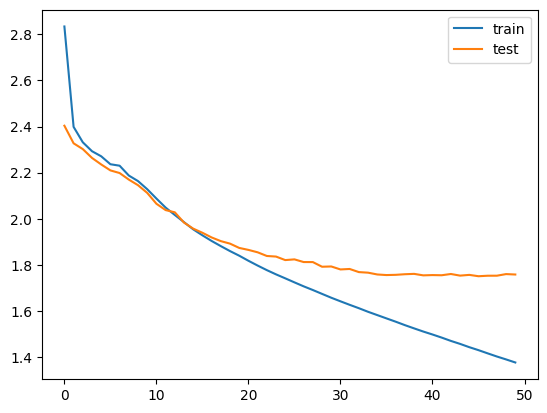

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
src_word_index_reverse = tokenizer.index_word
target_word_index_reverse = y_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = Embedding(y_voc_size, embedding_dim, trainable=True)(decoder_inputs)
#decoder_embedding = Embedding(y_voc_size, embedding_dim, trainable=True)(decoder_inputs)


# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])


#attention inference
attn_out_inf, attn_states_inf = attn([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [ ]:
target_word_index['endtoken']

2

In [ ]:

# src_word_index_reverse = tokenizer.index_word
# target_word_index_reverse = y_tokenizer.index_word
# target_word_index = y_tokenizer.word_index


def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['sostoken']) and i!=target_word_index['endtoken']):
        newString=newString+target_word_index_reverse[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+src_word_index_reverse[i]+' '
    return newString



In [ ]:
import tensorflow as tf


def decode_sequence(input_seq):
    # Encode the input as state vectors.
    #print("input_seq shape: {}".format(input_seq.shape))

    e_out, e_h, e_c = encoder_model.predict(input_seq)


    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['sostoken']
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq, e_out, e_h, e_c], verbose=0)
        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])

        sampled_token = target_word_index_reverse[sampled_token_index]
        if(sampled_token!='endtoken'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'endtoken' or len(decoded_sentence.split()) >= (max_len_summary-1)):
            stop_condition = True


        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
# 16 aug LATEST

for i in range(100):
  print("Review:",seq2text(seq_Xval[i]))
  print("Original summary:",seq2summary(seq_yval[i]))
  print("Predicted summary:",decode_sequence(seq_Xval[i].reshape(1,max_len_text)))
  print("\n")

Review: i have always been a fan of premium beverages and sodas i will never buy pepsi or coke products at a minimum i will by jones because they use pure cane sugar i really enjoyed getting to try this product and i am actually going on now to start ordering it on a regular basis you can really tell the difference between pop and juice with sparkling water it is a bit on the sweet side and i did not think they needed to add the extra juice flavors to make it just right however this is a great product good size for individual servings and it arrived in good packaging by amazon 
Original summary: the of this drink 
1/1 [==============================] - 0s 28ms/step
Predicted summary:  to is good good to to to good


Review: we use gluten free bisquick to make coated baked chicken waffles pancakes biscuits chicken pot pie there are many recipes available to make quick easy meals we really like it everyone can eat it instead of just making a gluten free meal for the one person who is glu

In [ ]:
# trainable = false
for i in range(100):
  print("Review:",seq2text(seq_Xval[i]))
  print("Original summary:",seq2summary(seq_yval[i]))
  print("Predicted summary:",decode_sequence(seq_Xval[i].reshape(1,max_len_text)))
  print("\n")

Review: we buy the bulk honey to make various kinds of so far the flavor has come out great and we get a little of the blackberry flavor as well 
Original summary: good 
input_seq shape: (1, 100)
1/1 [==============================] - 0s 30ms/step
Predicted summary:  vanilla is sugar sugar sugar sugar sugar flavor


Review: i had high expectations for this product considering the other reviews but i cannot choke these things down not trying to down talk these things but i just cannot eat them to me its just short of cardboard oh well 
Original summary: not for 
input_seq shape: (1, 100)
1/1 [==============================] - 0s 25ms/step
Predicted summary:  not did did no no and taste flavor


Review: i have always used avoderm started with the natural lamb and rice then chicken and now i have switched to this red meat potatoes flavor my dog did not go crazy for the first two but he loves this flavor he used to be a throughout the day but now he eats all of his breakfast and dinner wit

In [ ]:
# trainable=true
for i in range(100):
  print("Review:",seq2text(seq_Xval[i]))
  print("Original summary:",seq2summary(seq_yval[i]))
  print("Predicted summary:",decode_sequence(seq_Xval[i].reshape(1,max_len_text)))
  print("\n")

Review: we buy the bulk honey to make various kinds of so far the flavor has come out great and we get a little of the blackberry flavor as well 
Original summary: good 
input_seq shape: (1, 100)
1/1 [==============================] - 1s 1s/step
Predicted summary:  to is to and and and and


Review: i had high expectations for this product considering the other reviews but i cannot choke these things down not trying to down talk these things but i just cannot eat them to me its just short of cardboard oh well 
Original summary: not for 
input_seq shape: (1, 100)
1/1 [==============================] - 0s 30ms/step
Predicted summary:  not is and and and and and and


Review: i have always used avoderm started with the natural lamb and rice then chicken and now i have switched to this red meat potatoes flavor my dog did not go crazy for the first two but he loves this flavor he used to be a throughout the day but now he eats all of his breakfast and dinner within a minute 
Original summar

In [ ]:
for i in range(700,750):
  print("Review:",seq2text(seq_Xtr[i]))
  print("Original summary:",seq2summary(seq_ytr[i]))
  print("Predicted summary:",decode_sequence(seq_Xtr[i].reshape(1,max_len_text)))
  print("\n")

Review: mushrooms nice clean beautiful little stem almost 100 first class product would recommend mushrooms anyone 
Original summary: 
input_seq shape: (1, 100)
1/1 [==============================] - 0s 35ms/step
Predicted summary:  bonsai bonsai bonsai is is ounce ounce ounce


Review: strong dark intense strong enough man mellow enough woman really good coffee bitter taste love good cream sweetner watered taste plain wish made decaf could drink 24 7 
Original summary: good cuppa joe 
input_seq shape: (1, 100)
1/1 [==============================] - 0s 27ms/step
Predicted summary:  if of is is raspberry raspberry raspberry raspberry


Review: toy keeps 7 month old husky german shepherd mix fully engaged 20 minutes prevent running jumping playing soft tissue injury hard keep highly energetic curious puppy running around living room frustration busy buddy bouncy ball really holds attention seems burn excess mental physical energy seems afterwards shower get laundry chores sight long budd